In [6]:
import quantumpropagator as qp
from ipywidgets import interactive, interact, HBox, Layout, VBox
import pandas as pd
import os
from tqdm import tqdm_notebook as tqdm
import ipywidgets as widgets
from ipywidgets import interact, fixed
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
import numpy as np
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline
#%matplotlib notebook
# import seaborn
# from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

pd.options.display.max_rows = 5
pd.options.display.max_columns = 90

print ('everything loaded')

everything loaded


In [7]:
fol = 'C:\\Users\\utente\\Desktop\\DATA\\USA'
subfolders = sorted([dir for dir in os.listdir(
    fol) if os.path.isdir(os.path.join(fol, dir))])
print(''.join(['{:2} -> {}\n'.format(a, b) for a, b in enumerate(subfolders)]))

 0 -> Old-m-only-IR-middle140
 1 -> b-UV-0.22_0000
 2 -> d-experiments_smooth01_0000
 3 -> d-experiments_smooth10_0000
 4 -> experiment_alessio_0000
 5 -> m-IR-Polarized-NOR_0000
 6 -> m-only_IR_middle140-9331_0000
 7 -> m-only_IR_middle140_0000
 8 -> m-only_IR_middle140_div10_0000
 9 -> position-from1_0000
10 -> position-from1_mult_0000
11 -> position-from2_0000
12 -> position-from2_mult_0000
13 -> position-from3_0000
14 -> position-from3_mult_0000
15 -> position-from4_0000
16 -> position-from4_mult_0000
17 -> position-from5_0000
18 -> position-from6_0000
19 -> position-from7_0000
20 -> smoothing_only_17_0000
21 -> smoothing_only_9_0000
22 -> smoothing_only_NOT_smoothed_0000
23 -> y-IR140-S0notdivided_0000
24 -> y-IR_140_nac0_0000
25 -> y-UV-S0notdivided_0000
26 -> z-from1_0000



In [8]:
def from_folder_to_dataframe(folder):
    '''
    this function returns the dataframe given a folder
    '''
    project_folder = os.path.abspath(folder)
    output_norm = os.path.join(project_folder, 'output')
    output_popu = os.path.join(project_folder, 'outputPopul')
    output_csv = os.path.join(project_folder,os.path.basename(folder) + '.csv')

    df_norm = pd.read_csv(output_norm, delim_whitespace=True, index_col=0, names=[
                          'counter', 'steps', 'fs', 'Norm deviation', 'Kinetic', 'Potential', 'Total', 'Total Deviation', 'Xpulse', 'Ypulse', 'Zpulse', 'AbZino'])
    df_popu = pd.read_csv(output_popu, delim_whitespace=True, names=[
                          'fs', 'S0', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7'])
    df_all = pd.concat([df_norm, df_popu], axis=1)

    output_abso = os.path.join(project_folder, 'Output_Abs')
    if os.path.isfile(output_abso):
        df_abso = pd.read_csv(output_abso, delim_whitespace=True, names=[
                              'Time AU', 'Abs Tot', 'Abs S0', 'Abs S1', 'Abs S2', 'Abs S3', 'Abs S4', 'Abs S5', 'Abs S6', 'Abs S7'])
        df_all = pd.concat([df_all, df_abso], axis=1)
    

        AU_dt = qp.fromFsToAu(df_popu['fs'].iloc[1])
        for electronic_state in ['Tot','S0','S1','S2','S3','S4','S5','S6','S7']:
            df_all['P(t) {}'.format(electronic_state)] = -(np.cumsum(df_all['Abs {}'.format(electronic_state)])*AU_dt)

    df_all.to_csv(output_csv)

    return(df_all)

# Smoothing effects

In [9]:
def make_population_graphs(multiple_dataframes, names, rangeS):
    for state in rangeS:
        fig, ax0 = plt.subplots(1, 1, figsize=(10, 5))
        ax0.set_xlabel('fs')
        ax0.set_ylabel('Population')
        ax0.set_ylim(0, 1.01)
        #ax0.set_ylim(0, 0.3)
        ax0.set_title(r'Population of $S_{}$'.format(state))
        for i, df in enumerate(multiple_dataframes):
            ax0.plot(df['fs'].iloc[:, 1],
                     df['S{}'.format(state)], label=names[i])
        ax0.legend()
        fig.tight_layout()

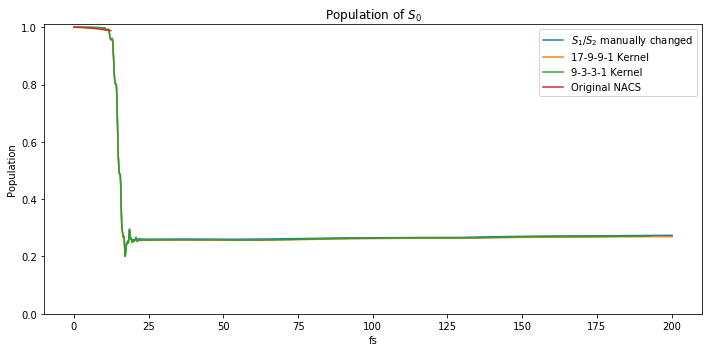

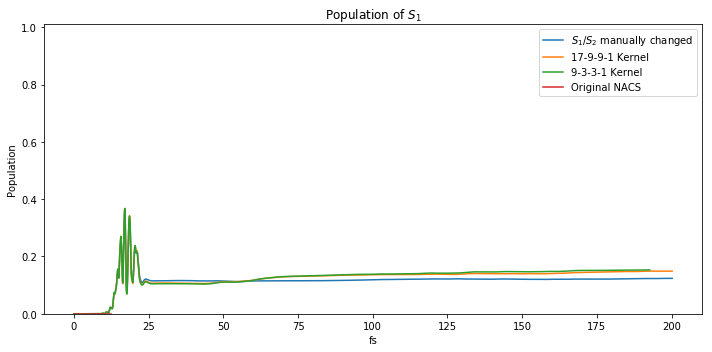

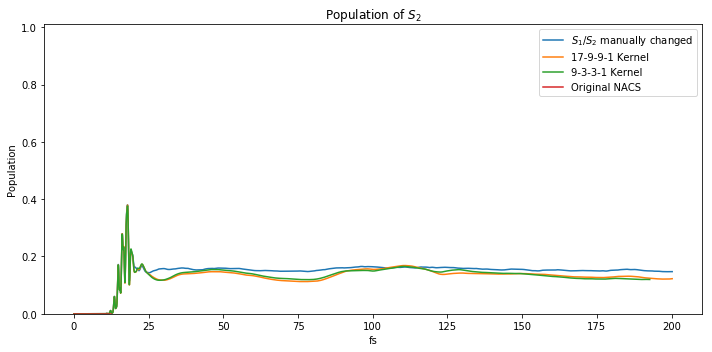

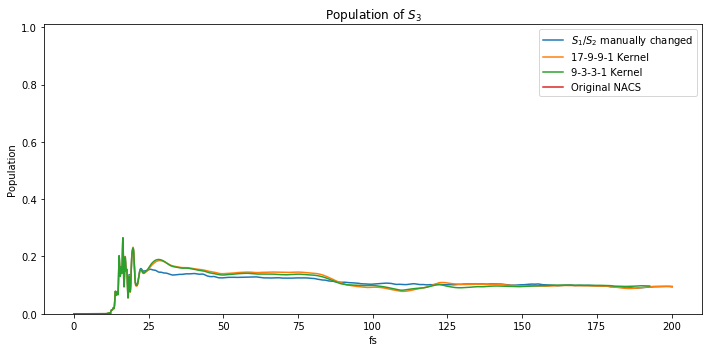

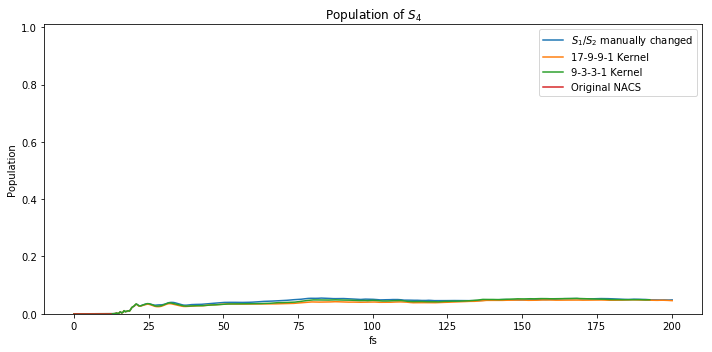

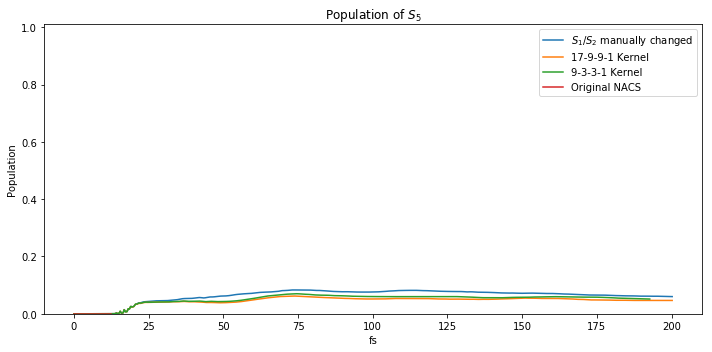

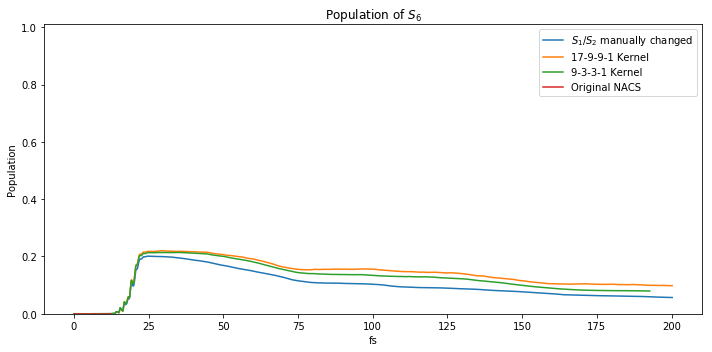

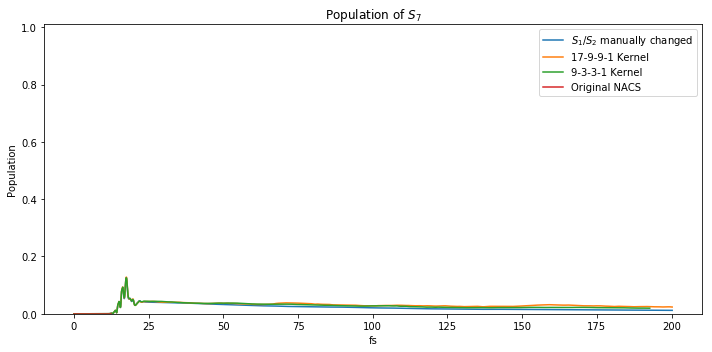

In [10]:
numbers = [0, 2, 21, 22]
names = [subfolders[x] for x in numbers]
names = ['$S_1/S_2$ manually changed', '17-9-9-1 Kernel', '9-3-3-1 Kernel', 'Original NACS']
dfs = [from_folder_to_dataframe(
    os.path.join(fol, subfolders[x])) for x in numbers]

how_many_states = 8
make_population_graphs(dfs, names, range(how_many_states))

# position runs

## not multiplied

FigureCanvasNbAgg()

FigureCanvasNbAgg()

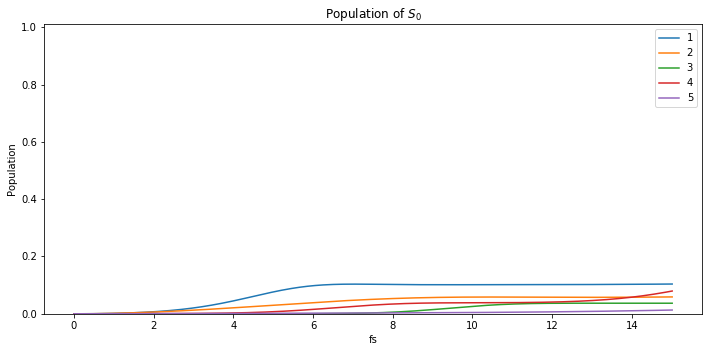

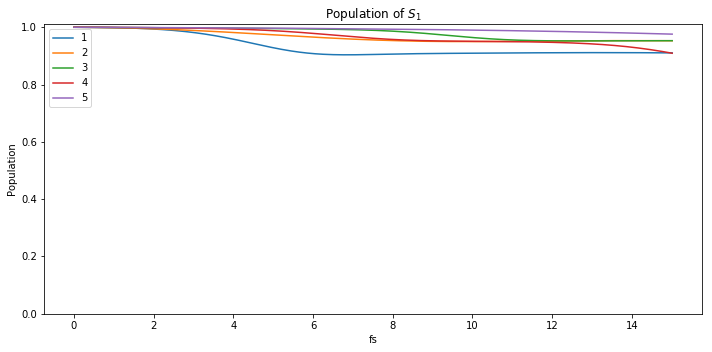

In [11]:
%matplotlib widget
numbers = [9,11,13,15,17]

names = ['1', '2', '3', '4', '5']
dfs = [from_folder_to_dataframe(
    os.path.join(fol, subfolders[x])) for x in numbers]
how_many_states = 2
make_population_graphs(dfs, names, range(how_many_states))

## multiplied

FigureCanvasNbAgg()

FigureCanvasNbAgg()

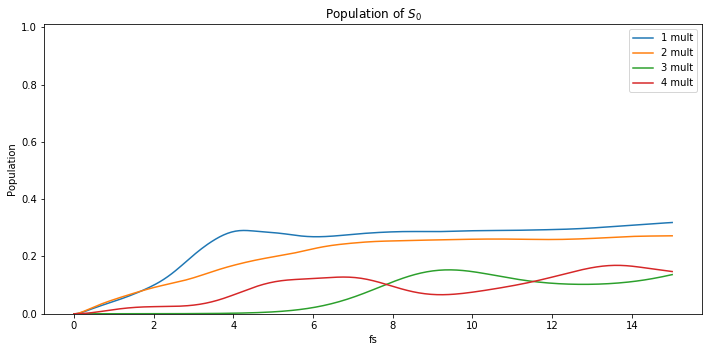

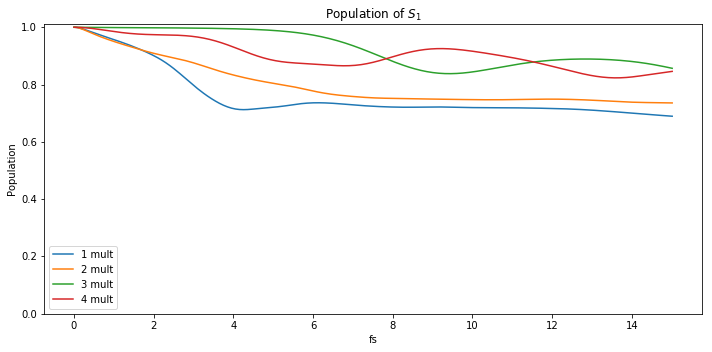

In [12]:
numbers = [10,12,14,16]
names = ['1 mult', '2 mult', '3 mult', '4 mult']
dfs = [from_folder_to_dataframe(
    os.path.join(fol, subfolders[x])) for x in numbers]

how_many_states = 2
make_population_graphs(dfs, names, range(how_many_states))

# Cooking

FigureCanvasNbAgg()

FigureCanvasNbAgg()

FigureCanvasNbAgg()

FigureCanvasNbAgg()

FigureCanvasNbAgg()

FigureCanvasNbAgg()

FigureCanvasNbAgg()

FigureCanvasNbAgg()

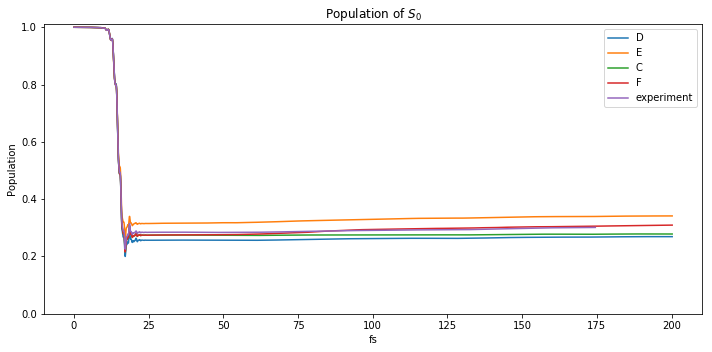

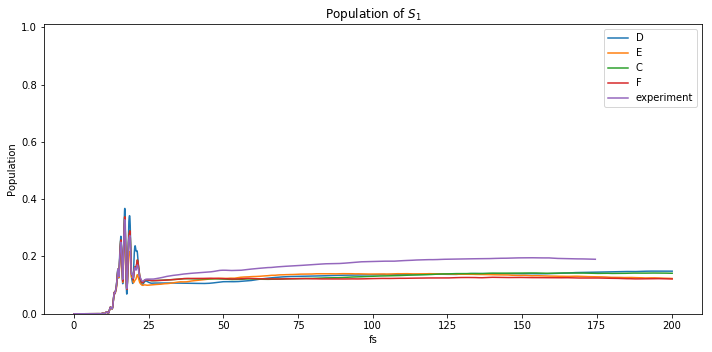

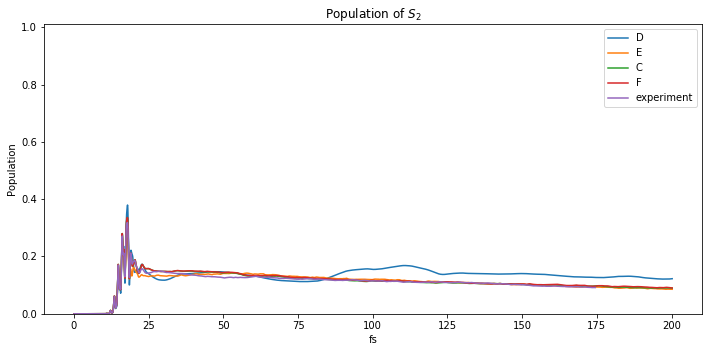

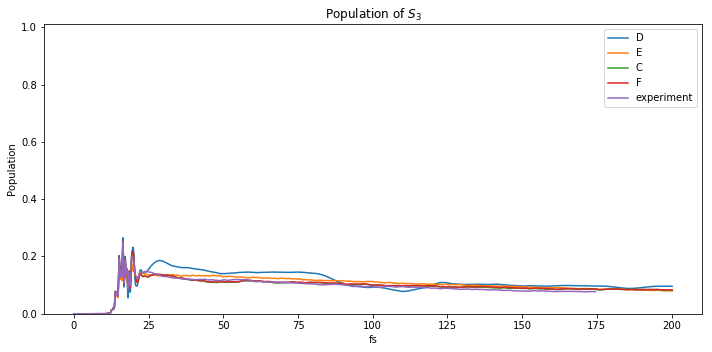

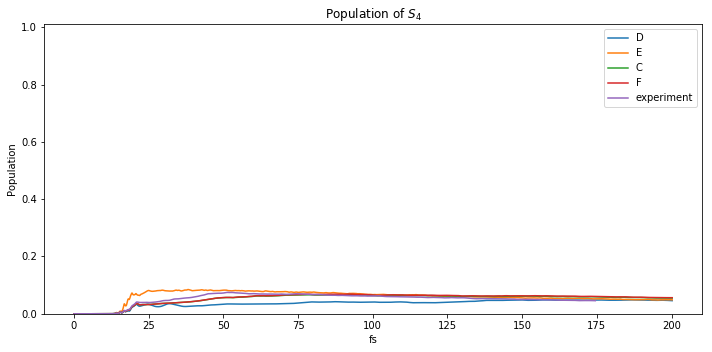

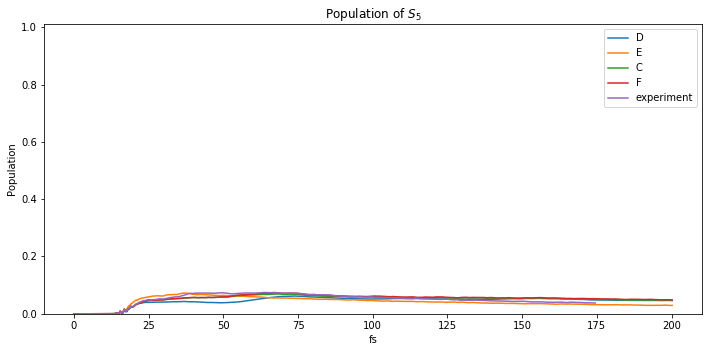

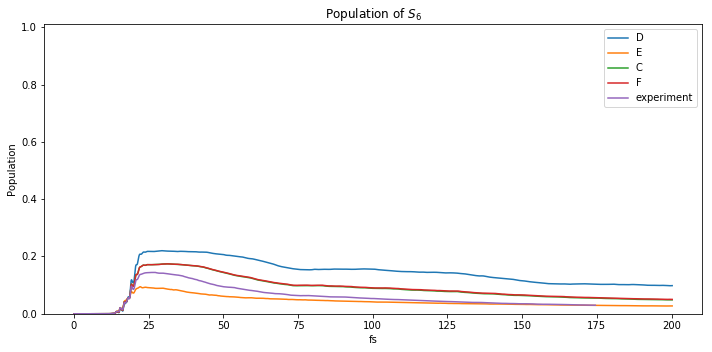

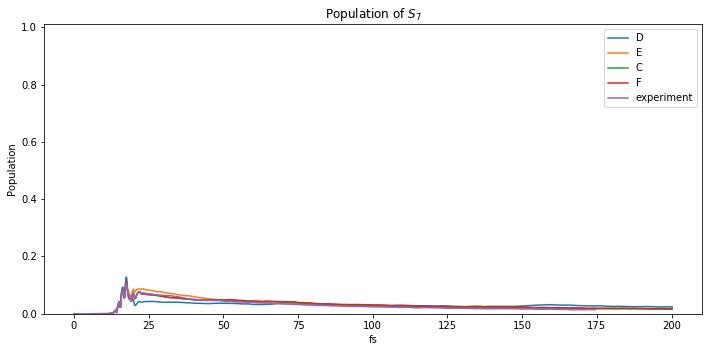

In [13]:
# %matplotlib notebook
desktop = 'C:\\Users\\utente\\Desktop'
numbers = [2,3,8,23,4]
names = [subfolders[x] for x in numbers]
# d-experiments_smooth01_0000 d-experiments_smooth10_0000 m-only_IR_middle140_div10_0000 y-IR140-S0notdivided_0000
names = ['D','E','C','F','experiment']

dfs = [from_folder_to_dataframe(
    os.path.join(fol, subfolders[x])) for x in numbers]

how_many_states = 8

for name, df in zip(names,dfs):
    path_file = os.path.join(desktop,'{}.csv'.format(name))
    df.to_csv()

make_population_graphs(dfs, names, range(how_many_states))

FigureCanvasNbAgg()

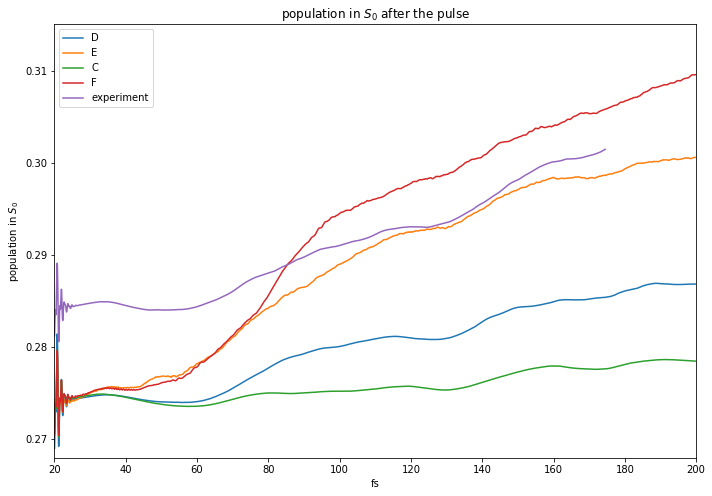

In [14]:
fig , ax0 = plt.subplots(1,1,figsize=(10,7));

numbers = [2,3,8,23,4]
# d-experiments_smooth01_0000 d-experiments_smooth10_0000 m-only_IR_middle140_div10_0000 y-IR140-S0notdivided_0000
labels = ['D','E','C','F','experiment']

displacements = [0.0176,-0.041,0,0,0]

for x in range(len(numbers)):
    ax0.plot(dfs[x]['fs'].iloc[:, 1], dfs[x]['S0']+displacements[x], label=labels[x])
    ax0.legend()
    ax0.set_xlabel('fs')
    ax0.set_ylim(0.268,0.315)
    ax0.set_xlim(20,200)
    ax0.set_ylabel(r'population in $S_0$')
    ax0.set_title(r'population in $S_0$ after the pulse')
fig.tight_layout()


FigureCanvasNbAgg()

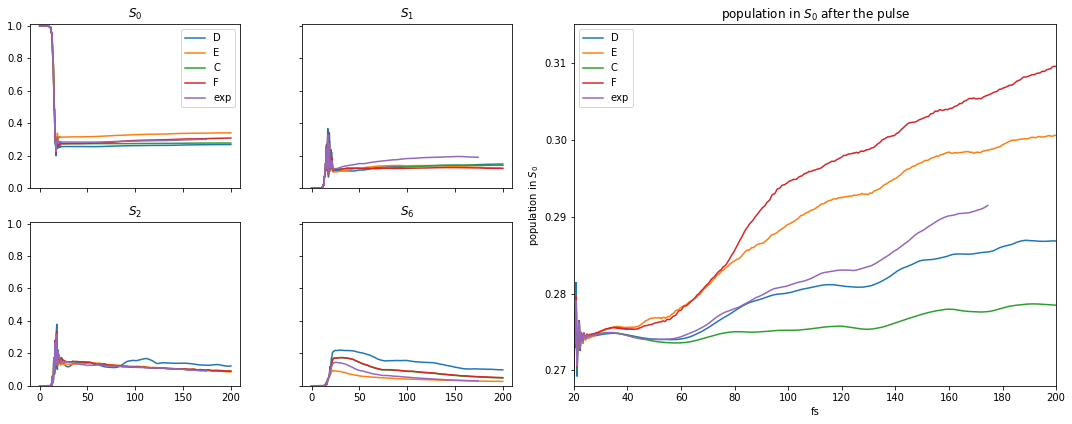

In [15]:
fig , [[ax0,ax1,b0,b1],[ax2,ax3,b2,b3]] = plt.subplots(2,4,figsize=(15,6),sharex=True, sharey=True);
labels = names
labels = ['D','E','C','F','exp']
displacements = [0.0176,-0.041,0,0,-0.01]


b0 = plt.subplot2grid((2, 4), (0, 2), rowspan=2, colspan=2)

for x in range(len(numbers)):
    ax0.plot(dfs[x]['fs'].iloc[:, 1], dfs[x]['S0'],label=labels[x])
    ax0.set_ylim(0.0,1.01)
    ax0.legend()
    ax0.set_title(r'$S_0$')
    ax1.plot(dfs[x]['fs'].iloc[:, 1], dfs[x]['S1'],label=labels[x])
    ax1.set_ylim(0.0,1.01)
    ax1.set_title(r'$S_1$')
    ax2.plot(dfs[x]['fs'].iloc[:, 1], dfs[x]['S2'],label=labels[x])
    ax2.set_ylim(0.0,1.01)
    ax2.set_title(r'$S_2$')
    ax3.plot(dfs[x]['fs'].iloc[:, 1], dfs[x]['S6'],label=labels[x])
    ax3.set_ylim(0.0,1.01)
    ax3.set_title(r'$S_6$')
    
    b0.plot(dfs[x]['fs'].iloc[:, 1], dfs[x]['S0']+displacements[x], label=labels[x])
    b0.legend()
    b0.set_xlabel('fs')
    b0.set_ylim(0.268,0.315)
    b0.set_xlim(20,200)
    b0.set_ylabel(r'population in $S_0$')
    b0.set_title(r'population in $S_0$ after the pulse')
fig.tight_layout()
#fig.savefig('C:\\Users\\utente\\Desktop\\Dropbox\\u-3dPropagation_manuscript\\Report\\images\\cooking.png')


In [16]:
numbers = [2,23]
names = [subfolders[x] for x in numbers]
# d-experiments_smooth01_0000 d-experiments_smooth10_0000 m-only_IR_middle140_div10_0000 y-IR140-S0notdivided_0000
names = ['D','F']

dfs = [from_folder_to_dataframe(
    os.path.join(fol, subfolders[x])) for x in numbers]

how_many_states = 8


dfD, dfF = dfs

FigureCanvasNbAgg()

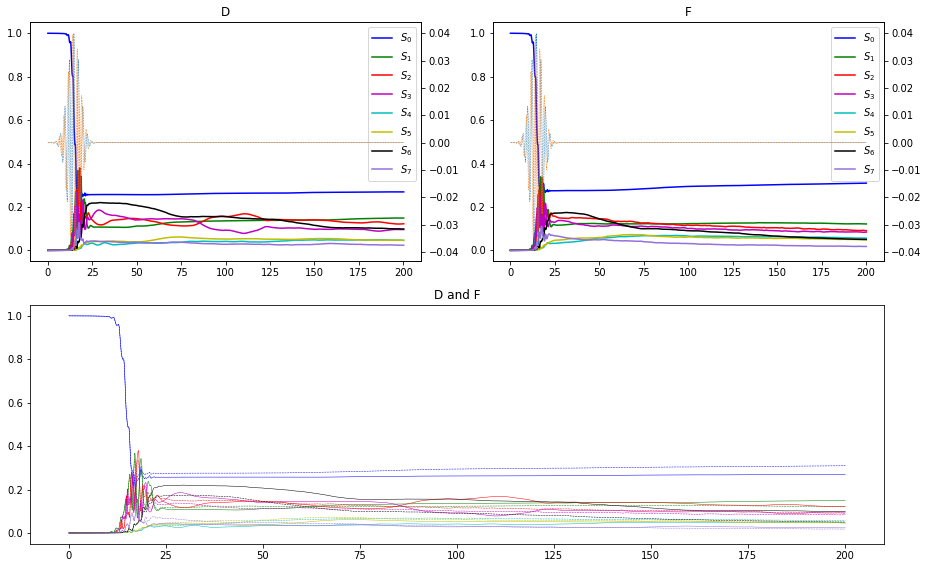

In [17]:
fig, [[ax0,ax1],[ax2,ax3]] = plt.subplots(2,2,figsize=(13,8))
colors = ['b', 'g', 'r', 'm', 'c', 'y', 'k', 'mediumpurple']
here = dfD
for state in [0,1,2,3,4,5,6,7]:
    ax0.plot(here['fs'].iloc[:,1], here['S{}'.format(state)], label=r'$S_{}$'.format(state), color=colors[state])

ax00 = ax0.twinx()
ax00.plot(here['fs'].iloc[:,1], here['Xpulse'], label='X_pulse', ls='--', lw=.5)
ax00.plot(here['fs'].iloc[:,1], here['Ypulse'], label='Y_pulse', ls='--', lw=.5)
ax0.set_title('D')
ax0.legend()

here = dfF
for state in [0,1,2,3,4,5,6,7]:
    ax1.plot(here['fs'].iloc[:,1], here['S{}'.format(state)], label=r'$S_{}$'.format(state), color=colors[state])

ax11 = ax1.twinx()
ax11.plot(here['fs'].iloc[:,1], here['Xpulse'], label='X_pulse', ls='--', lw=.5)
ax11.plot(here['fs'].iloc[:,1], here['Ypulse'], label='Y_pulse', ls='--', lw=.5)
ax1.set_title('F')
ax1.legend()

ax2 = plt.subplot2grid((2, 2), (1, 0), colspan=2)

for state in [0,1,2,3,4,5,6,7]:
    ax2.plot(dfD['fs'].iloc[:,1], dfD['S{}'.format(state)], label=r'$S_{}$'.format(state), color=colors[state], lw=.5)
    ax2.plot(dfF['fs'].iloc[:,1], dfF['S{}'.format(state)], label=r'$S_{}$'.format(state), color=colors[state], ls='--', lw=.5)

ax2.set_title('D and F')


fig.tight_layout()

In [18]:
dfD

,steps,fs,Norm deviation,Kinetic,Potential,Total,Total Deviation,Xpulse,Ypulse,Zpulse,AbZino,fs,S0,S1,S2,S3,S4,S5,S6,S7,Time AU,Abs Tot,Abs S0,Abs S1,Abs S2,Abs S3,Abs S4,Abs S5,Abs S6,Abs S7,P(t) Tot,P(t) S0,P(t) S1,P(t) S2,P(t) S3,P(t) S4,P(t) S5,P(t) S6,P(t) S7
0,0,0.000000,3.330669e-16,0.091654,0.091279,0.182933,0.000000e+00,6.018470e-07,-0.000003,0.0,-1.066187e-66,0.0000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0000,-1.066190e-66,-1.066190e-66,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.208296e-66,2.208296e-66,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00
1,100,0.050050,1.741657e-08,0.091655,0.091278,0.182933,7.450631e-09,1.788736e-07,-0.000004,0.0,-1.066273e-66,0.0501,1.000000,1.901010e-12,3.668870e-09,2.496840e-10,2.404130e-10,9.419040e-10,5.769070e-10,1.476350e-09,2.0671,-1.066270e-66,-1.066270e-66,-4.681490e-72,-2.172220e-74,-7.164960e-76,-7.088750e-75,-1.748820e-74,-6.107180e-75,-8.409260e-74,4.416757e-66,4.416757e-66,9.696316e-72,4.499108e-74,1.484009e-75,1.468224e-74,3.622161e-74,1.264921e-74,1.741728e-73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999,399900,200.150311,7.768910e-02,0.340407,3.766910,4.107318,-3.924385e+00,0.000000e+00,-0.000000,0.0,-1.384310e-05,200.1503,0.269247,1.487770e-01,1.224270e-01,9.583840e-02,4.587400e-02,4.657370e-02,9.827060e-02,2.365020e-02,8266.2078,-1.384310e-05,-3.001060e-06,-1.068970e-06,-2.229460e-06,-1.663510e-06,-2.182180e-06,-2.975320e-06,-3.057000e-07,-4.168960e-07,1.293178e-01,1.401046e-02,1.330160e-02,2.200517e-02,1.932773e-02,1.761958e-02,2.954225e-02,5.268524e-03,8.242518e-03
4000,399999,200.199861,7.770602e-02,0.340392,3.766700,4.107092,-3.924159e+00,0.000000e+00,-0.000000,0.0,-1.384129e-05,200.1999,0.269243,1.487750e-01,1.224940e-01,9.579620e-02,4.584260e-02,4.657950e-02,9.828960e-02,2.360630e-02,8268.2542,-1.384130e-05,-2.994170e-06,-1.068850e-06,-2.224500e-06,-1.668100e-06,-2.183810e-06,-2.979460e-06,-3.050740e-07,-4.173390e-07,1.293465e-01,1.401666e-02,1.330382e-02,2.200978e-02,1.933119e-02,1.762410e-02,2.954842e-02,5.269156e-03,8.243382e-03


FigureCanvasNbAgg()

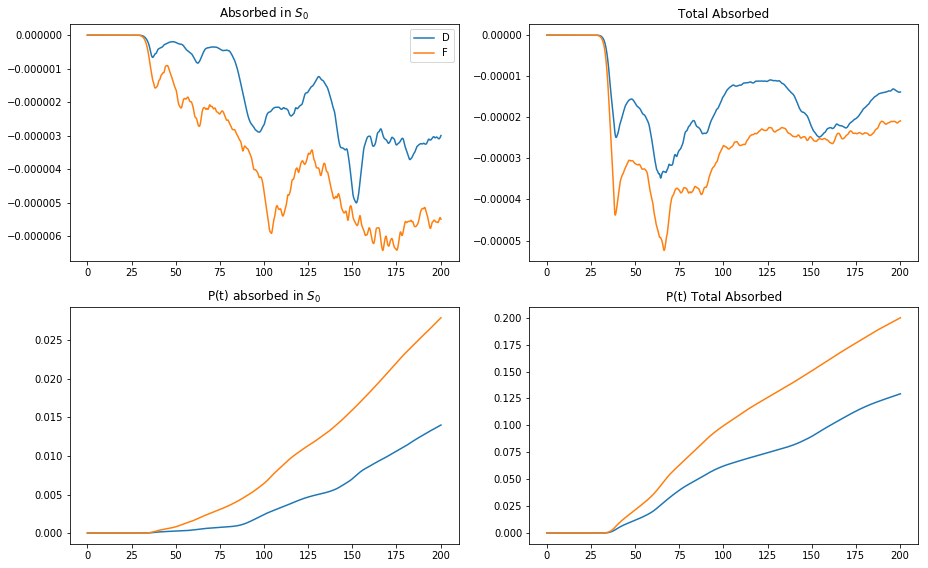

In [19]:
fig, [[ax0,ax1],[ax2,ax3]] = plt.subplots(2,2,figsize=(13,8))
colors = ['b', 'g', 'r', 'm', 'c', 'y', 'k', 'mediumpurple']

ax0.plot(dfD['fs'].iloc[:,1], dfD['Abs S0'],label='D')
ax0.plot(dfF['fs'].iloc[:,1], dfF['Abs S0'],label='F')
ax0.set_title(r'Absorbed in $S_0$')

ax1.plot(dfD['fs'].iloc[:,1], dfD['Abs Tot'])
ax1.plot(dfF['fs'].iloc[:,1], dfF['Abs Tot'])
ax1.set_title(r'Total Absorbed')

ax2.plot(dfD['fs'].iloc[:,1], dfD['P(t) S0'])
ax2.plot(dfF['fs'].iloc[:,1], dfF['P(t) S0'])
ax2.set_title(r'P(t) absorbed in $S_0$')

ax3.plot(dfD['fs'].iloc[:,1], dfD['P(t) Tot'])
ax3.plot(dfF['fs'].iloc[:,1], dfF['P(t) Tot'])
ax3.set_title(r'P(t) Total Absorbed')

ax0.legend()

fig.tight_layout();

# UV vs 140-long

FigureCanvasNbAgg()

FigureCanvasNbAgg()

FigureCanvasNbAgg()

FigureCanvasNbAgg()

FigureCanvasNbAgg()

FigureCanvasNbAgg()

FigureCanvasNbAgg()

FigureCanvasNbAgg()

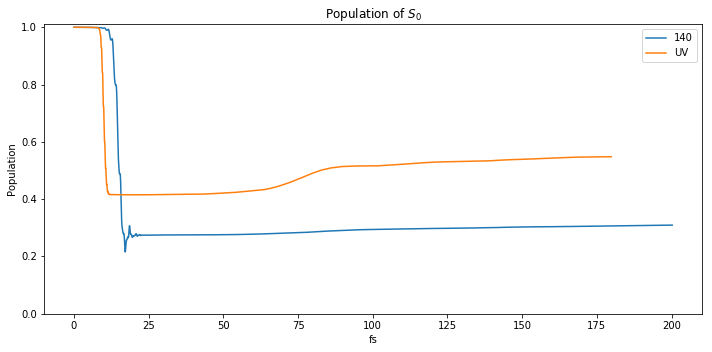

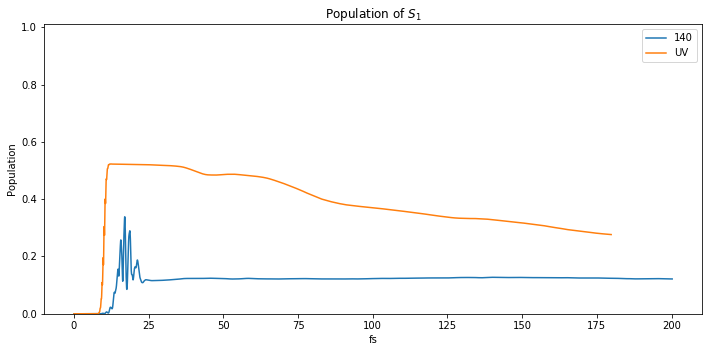

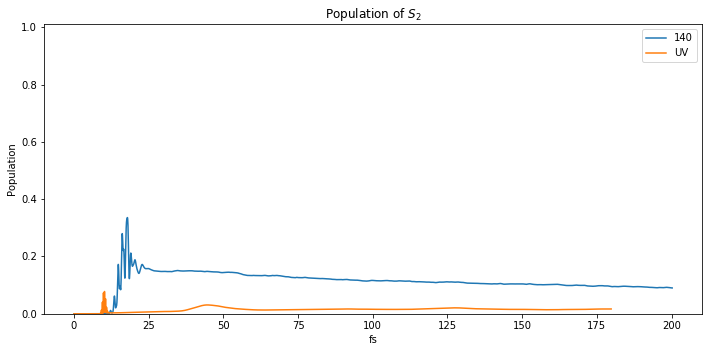

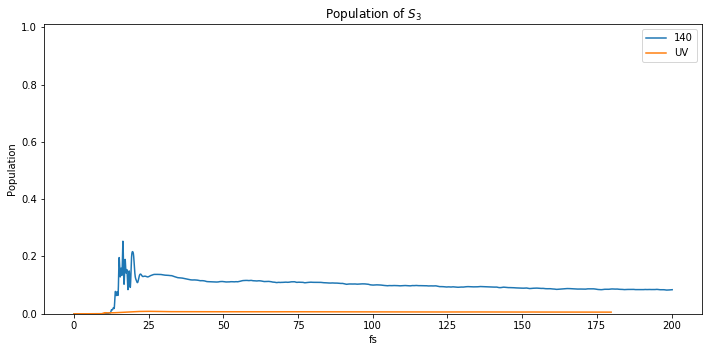

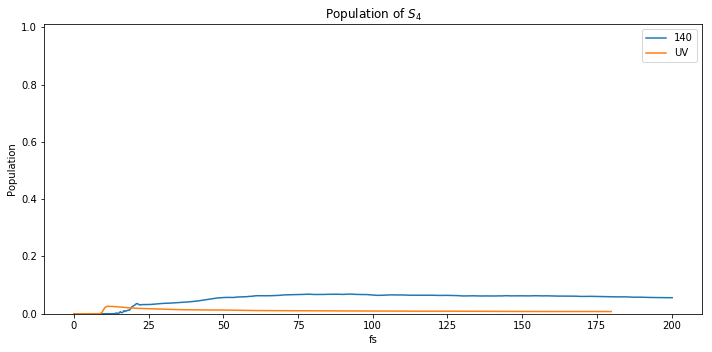

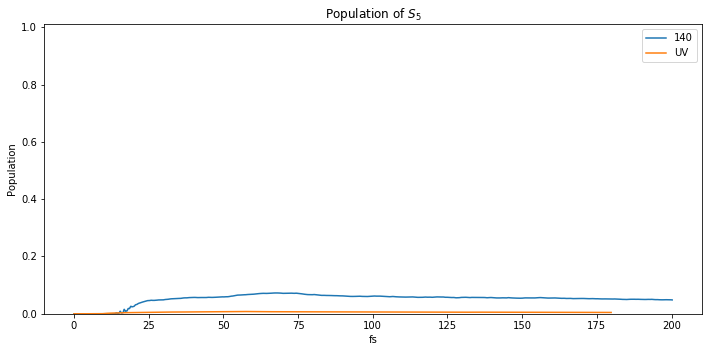

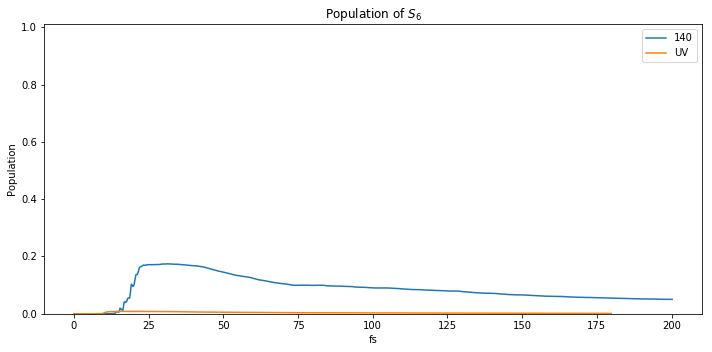

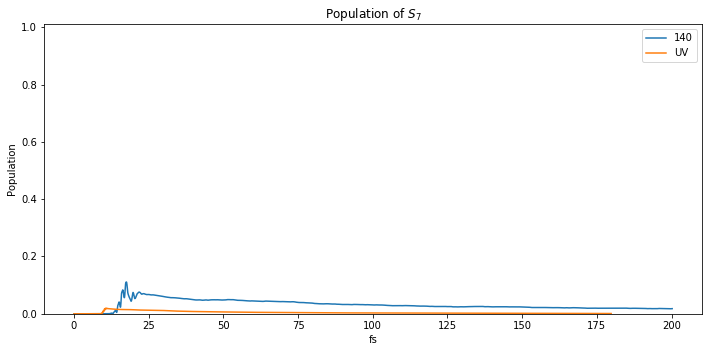

In [20]:
#%matplotlib notebook

numbers = [23,25]
# y-IR140-S0notdivided_0000 y-UV-S0notdivided_0000
names = [subfolders[x] for x in numbers]
names = ['140','UV']

dfs = [from_folder_to_dataframe(
    os.path.join(fol, subfolders[x])) for x in numbers]

how_many_states = 8
make_population_graphs(dfs, names, range(how_many_states))

In [21]:
dfs[0]

,steps,fs,Norm deviation,Kinetic,Potential,Total,Total Deviation,Xpulse,Ypulse,Zpulse,AbZino,fs,S0,S1,S2,S3,S4,S5,S6,S7,Time AU,Abs Tot,Abs S0,Abs S1,Abs S2,Abs S3,Abs S4,Abs S5,Abs S6,Abs S7,P(t) Tot,P(t) S0,P(t) S1,P(t) S2,P(t) S3,P(t) S4,P(t) S5,P(t) S6,P(t) S7
0,0,0.000000,3.330669e-16,0.091654,0.091279,0.182933,0.000000e+00,6.018470e-07,-0.000003,0.0,-1.066187e-66,0.0000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0000,-1.066190e-66,-1.066190e-66,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.208296e-66,2.208296e-66,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00
1,100,0.050050,1.741663e-08,0.091653,0.091280,0.182933,7.570760e-09,1.788736e-07,-0.000004,0.0,-1.067019e-66,0.0501,0.999999,4.710600e-07,1.546090e-13,1.635820e-16,3.232010e-14,1.960990e-13,3.367220e-13,2.497590e-12,2.0671,-1.067020e-66,-1.066420e-66,-6.011790e-70,-1.124400e-77,-1.176140e-79,-1.674370e-80,-2.406950e-81,-1.854890e-81,-7.420340e-82,4.418311e-66,4.417068e-66,1.245164e-69,2.328861e-77,2.436025e-79,3.467960e-80,4.985282e-81,3.841853e-81,1.536903e-81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999,399900,200.150311,1.177907e-01,0.316253,3.219603,3.535856,-3.352923e+00,0.000000e+00,-0.000000,0.0,-2.088250e-05,200.1503,0.309529,1.215840e-01,9.023510e-02,8.410050e-02,5.621300e-02,4.842110e-02,5.028350e-02,1.792710e-02,8266.2078,-2.088250e-05,-5.482220e-06,-2.579830e-06,-4.060250e-06,-2.690450e-06,-3.036780e-06,-2.176630e-06,-3.626200e-07,-4.937140e-07,1.999339e-01,2.792528e-02,2.342225e-02,3.649613e-02,2.734930e-02,3.006184e-02,3.607304e-02,7.170778e-03,1.143525e-02
4000,399999,200.199861,1.178175e-01,0.316139,3.219368,3.535507,-3.352574e+00,0.000000e+00,-0.000000,0.0,-2.086916e-05,200.1999,0.309526,1.215830e-01,9.021920e-02,8.409070e-02,5.622700e-02,4.836620e-02,5.028020e-02,1.795330e-02,8268.2542,-2.086920e-05,-5.489350e-06,-2.577390e-06,-4.046350e-06,-2.694660e-06,-3.033610e-06,-2.173030e-06,-3.626450e-07,-4.921360e-07,1.999771e-01,2.793665e-02,2.342759e-02,3.650451e-02,2.735488e-02,3.006812e-02,3.607754e-02,7.171529e-03,1.143627e-02


In [22]:
dfs[1]

,steps,fs,Norm deviation,Kinetic,Potential,Total,Total Deviation,Xpulse,Ypulse,Zpulse,AbZino,fs,S0,S1,S2,S3,S4,S5,S6,S7,Time AU,Abs Tot,Abs S0,Abs S1,Abs S2,Abs S3,Abs S4,Abs S5,Abs S6,Abs S7,P(t) Tot,P(t) S0,P(t) S1,P(t) S2,P(t) S3,P(t) S4,P(t) S5,P(t) S6,P(t) S7
0,0,0.000000,3.330669e-16,0.091654,0.091279,0.182933,0.000000e+00,2.612992e-30,0.0,0.0,-1.066187e-66,0.0000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0000,-1.066190e-66,-1.066190e-66,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.208296e-66,2.208296e-66,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00
1,100,0.050050,1.741664e-08,0.091653,0.091280,0.182933,7.529706e-09,4.662243e-30,0.0,0.0,-1.067019e-66,0.0501,0.999999,4.711740e-07,1.545630e-13,6.465310e-17,7.017670e-17,1.303550e-13,4.643510e-17,2.253440e-18,2.0671,-1.067020e-66,-1.066420e-66,-6.011790e-70,-1.123300e-77,-7.022740e-80,-4.430870e-88,-1.385360e-90,-7.197180e-92,-6.162140e-92,4.418311e-66,4.417068e-66,1.245164e-69,2.326582e-77,1.454552e-79,9.177231e-88,2.869362e-90,1.490682e-91,1.276304e-91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3591,359100,179.729874,7.148692e-02,0.445703,2.273173,2.718876,-2.535943e+00,0.000000e+00,0.0,0.0,-2.113919e-05,179.7299,0.548108,2.765770e-01,1.686350e-02,5.810050e-03,7.823990e-03,4.744230e-03,1.213080e-03,9.972160e-04,7422.8438,-2.113920e-05,-1.957630e-05,-5.422960e-07,-1.508560e-07,-1.018250e-07,-1.887550e-07,-2.017320e-07,-1.488610e-07,-2.285640e-07,1.127363e-01,7.867072e-02,7.292628e-03,2.899442e-03,2.523515e-03,3.610321e-03,4.655139e-03,4.764036e-03,8.320493e-03
3592,359200,179.779924,7.150866e-02,0.445704,2.272896,2.718599,-2.535666e+00,0.000000e+00,0.0,0.0,-2.112217e-05,179.7799,0.548109,2.765300e-01,1.687110e-02,5.808370e-03,7.825920e-03,4.742260e-03,1.213170e-03,9.958820e-04,7424.9109,-2.112220e-05,-1.956050e-05,-5.417790e-07,-1.509940e-07,-1.015910e-07,-1.884210e-07,-2.017400e-07,-1.488480e-07,-2.283300e-07,1.127800e-01,7.871123e-02,7.293750e-03,2.899754e-03,2.523725e-03,3.610711e-03,4.655557e-03,4.764344e-03,8.320966e-03


In [23]:
on_so,on_tot = dfs[0]['P(t) S0'].tail(1), dfs[0]['P(t) Tot'].tail(1)

In [24]:
tw_so,tw_tot = dfs[1]['P(t) S0'].tail(1), dfs[1]['P(t) Tot'].tail(1)

In [25]:
on_so, on_tot, on_so/on_tot

(4000    0.027937
 Name: P(t) S0, dtype: float64, 4000    0.199977
 Name: P(t) Tot, dtype: float64, 4000    0.139699
 dtype: float64)

In [26]:
tw_so,tw_tot, tw_so/tw_tot

(3592    0.078711
 Name: P(t) S0, dtype: float64, 3592    0.11278
 Name: P(t) Tot, dtype: float64, 3592    0.697918
 dtype: float64)

In [27]:
25*26*100

65000

In [48]:
%matplotlib widget
numbers = [9,11,13,15,17]

names = ['1', '2', '3', '4', '5']
multiple_dataframes = [from_folder_to_dataframe(
    os.path.join(fol, subfolders[x])) for x in numbers]
how_many_states = 2

import matplotlib
matplotlib.rcParams.update({'font.size': 20})

fig, [ax0,ax1] = plt.subplots(2, 1, figsize=(10, 10))
ax0.set_xlabel('fs')
ax0.set_ylabel('Population')
ax0.set_ylim(0, 1.01)
ax0.set_ylim(0, 0.15)
ax0.set_title(r'Population of $S_{}$'.format(0))
for i, df in enumerate(multiple_dataframes):
    ax0.plot(df['fs'].iloc[:, 1],
             df['S{}'.format(0)], label=names[i])
ax0.legend()

ax1.set_xlabel('fs')
ax1.set_ylabel('Population')
ax1.set_ylim(0, 1.01)
ax1.set_ylim(0.85,1)
ax1.set_title(r'Population of $S_{}$'.format(1))
for i, df in enumerate(multiple_dataframes):
    ax1.plot(df['fs'].iloc[:, 1],
             df['S{}'.format(1)], label=names[i])
ax1.legend()

fig.tight_layout()
        
   

FigureCanvasNbAgg()